# Задание к лабораторной работе №8 по машинному обучению

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.
2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
3. Выбрать порог классификации для LogisticRegression на основе метрики  

In [30]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             fbeta_score, roc_curve, roc_auc_score, precision_recall_curve,
                             auc, average_precision_score, classification_report)
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, r2_score
from sklearn.datasets import load_iris, load_diabetes
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

data1 = datasets.load_diabetes()
data2 = datasets.load_breast_cancer()

X_train1, X_test1, y_train1, y_test1 = train_test_split(data1['data'], data1['target'], test_size=0.33, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2['data'], data2['target'], test_size=0.33, random_state=42)

In [31]:
data1

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
R2 score (Linear regression): 0.510394257282125
R2 score (Polynomial regression): -46.599198706652835 

MSE (Linear regression): 2817.8082972215852
MSE (Polynomial regression): 273945.759525113 

MAE (Linear regression): 41.96450967184069
MAE (Polynomial regression): 308.91406327303014 

MAPE (Linear regression): 0.3551085988467079
MAPE (Polynomial regression): 2.6415830478908457


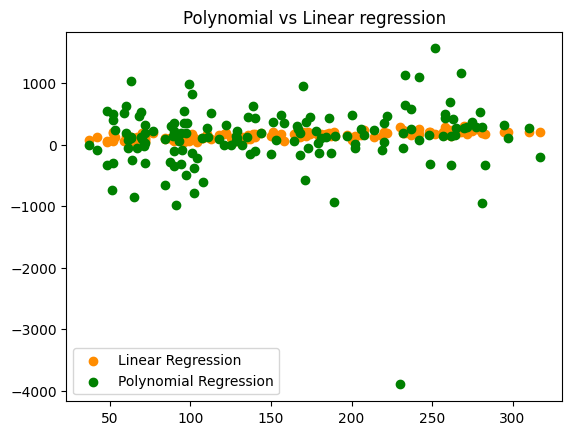

In [32]:
#feature_name, target_name = pd.DataFrame(data1).columns
X1 = data1['data']
print(X1)
Y1 = data1['target']

poly_features = PolynomialFeatures(degree=8, include_bias=True)
X1_poly = poly_features.fit_transform(data1['data'])
X1_poly_train, X1_poly_test = train_test_split(X1_poly, test_size=0.33, random_state=42)

sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X_train1, y_train1)
sk_lr_pred_res = sk_linear_regression.predict(X_test1)
sk_lr_pred_all_data_res = sk_linear_regression.predict(data1['data'])

sk_polynomial_regression = LinearRegression()
sk_polynomial_regression.fit(X1_poly_train, y_train1)
sk_poly_lr_pred_res = sk_polynomial_regression.predict(X1_poly_test)
sk_poly_lr_pred_all_data_res = sk_polynomial_regression.predict(X1_poly)

linear_regression_r2 = r2_score(y_test1, sk_lr_pred_res)
polynomial_regression_r2 = r2_score(y_test1, sk_poly_lr_pred_res)

linear_regression_mse = mean_squared_error(y_test1, sk_lr_pred_res)
polynomial_regression_mse = mean_squared_error(y_test1, sk_poly_lr_pred_res)

linear_regression_mae = mean_absolute_error(y_test1, sk_lr_pred_res)
polynomial_regression_mae = mean_absolute_error(y_test1, sk_poly_lr_pred_res)

linear_regression_mape = mean_absolute_percentage_error(y_test1, sk_lr_pred_res)
polynomial_regression_mape = mean_absolute_percentage_error(y_test1, sk_poly_lr_pred_res)

print(f'R2 score (Linear regression): {linear_regression_r2}')
print(f'R2 score (Polynomial regression): {polynomial_regression_r2}', '\n')

print(f'MSE (Linear regression): {linear_regression_mse}')
print(f'MSE (Polynomial regression): {polynomial_regression_mse}', '\n')

print(f'MAE (Linear regression): {linear_regression_mae}')
print(f'MAE (Polynomial regression): {polynomial_regression_mae}', '\n')

print(f'MAPE (Linear regression): {linear_regression_mape}')
print(f'MAPE (Polynomial regression): {polynomial_regression_mape}')

#plt.scatter(X_train1, sk_lr_pred_res)
plt.scatter(y_test1, sk_lr_pred_res, color='darkorange', label='Linear Regression')
plt.scatter(y_test1, sk_poly_lr_pred_res, color='green', label='Polynomial Regression')
#plt.plot(X1, sk_lr_pred_all_data_res, color='darkorange', label='Linear Regression')
#plt.plot(X1, sk_poly_lr_pred_all_data_res, color='green', label='Polynomial Regression')
plt.title('Polynomial vs Linear regression')
#plt.xlabel(feature_name)
#plt.ylabel(target_name)
plt.legend()
plt.show()

In [33]:
#Ridge regression (scikit-learn)
sk_ridge_regression = Ridge()
sk_ridge_regression.fit(X_train1, y_train1)

sk_ridge_pred_res = sk_ridge_regression.predict(X_test1)
sk_ridge_pred_train_res = sk_ridge_regression.predict(X_train1)

sk_ridge_r2 = r2_score(y_test1, sk_ridge_pred_res)
sk_ridge_train_r2 = r2_score(y_train1, sk_ridge_pred_train_res)

sk_ridge_mse = mean_squared_error(y_test1, sk_ridge_pred_res)
sk_ridge_train_mse = mean_squared_error(y_train1, sk_ridge_pred_train_res)

sk_ridge_mape = mean_absolute_percentage_error(y_test1, sk_ridge_pred_res)
sk_ridge_train_mape = mean_absolute_percentage_error(y_train1, sk_ridge_pred_train_res)

sk_ridge_mae = mean_absolute_error(y_test1, sk_ridge_pred_res)
sk_ridge_train_mae = mean_absolute_error(y_train1, sk_ridge_pred_train_res)

print(f'Ridge MAE: {sk_ridge_mae}')
print(f'Ridge MAE train: {sk_ridge_train_mae}', '\n')

print(f'Ridge R2 score: {sk_ridge_r2}')
print(f'Ridge train R2 score: {sk_ridge_train_r2}', '\n')

print(f'Ridge MSE: {sk_ridge_mse}')
print(f'Ridge train MSE: {sk_ridge_train_mse}', '\n')

print(f'Ridge MAPE: {sk_ridge_mape}')
print(f'Ridge train MAPE: {sk_ridge_train_mape}', '\n')

#print(f'prediction: {sk_ridge_pred_res}')

Ridge MAE: 46.456352070667506
Ridge MAE train: 50.579420827114404 

Ridge R2 score: 0.4445111375735453
Ridge train R2 score: 0.4062759706618534 

Ridge MSE: 3196.982774079495
Ridge train MSE: 3571.813503721092 

Ridge MAPE: 0.408869519390425
Ridge train MAPE: 0.47306376868053734 



In [34]:
#Lasso regression (scikit-learn)
sk_lasso_regression = Lasso()
sk_lasso_regression.fit(X_train1, y_train1)

sk_lasso_pred_res = sk_lasso_regression.predict(X_test1)
sk_lasso_pred_train_res = sk_lasso_regression.predict(X_train1)

sk_lasso_r2 = r2_score(y_test1, sk_lasso_pred_res)
sk_lasso_train_r2 = r2_score(y_train1, sk_lasso_pred_train_res)

sk_lasso_mse = mean_squared_error(y_test1, sk_lasso_pred_res)
sk_lasso_train_mse = mean_squared_error(y_train1, sk_lasso_pred_train_res)

sk_lasso_mape = mean_absolute_percentage_error(y_test1, sk_lasso_pred_res)
sk_lasso_train_mape = mean_absolute_percentage_error(y_train1, sk_lasso_pred_train_res)

sk_lasso_mae = mean_absolute_error(y_test1, sk_lasso_pred_res)
sk_lasso_train_mae = mean_absolute_error(y_train1, sk_lasso_pred_train_res)

print(f'Lasso MAE: {sk_lasso_mae}')
print(f'Lasso MAE train: {sk_lasso_train_mae}', '\n')

print(f'Lasso R2 score: {sk_lasso_r2}')
print(f'Lasso train R2 score: {sk_lasso_train_r2}', '\n')

print(f'Lasso MSE: {sk_lasso_mse}')
print(f'Lasso train MSE: {sk_lasso_train_mse}', '\n')

print(f'Lasso MAPE: {sk_lasso_mape}')
print(f'Lasso train MAPE: {sk_lasso_train_mape}', '\n')

#print(f'prediction: {sk_lasso_pred_res}')

Lasso MAE: 51.05956121475607
Lasso MAE train: 53.85091694581978 

Lasso R2 score: 0.36246898582743314
Lasso train R2 score: 0.34247491466833135 

Lasso MSE: 3669.156680024302
Lasso train MSE: 3955.6374052117603 

Lasso MAPE: 0.4539874796896753
Lasso train MAPE: 0.5105241614203507 



In [35]:
#ElasticNet regression (scikit-learn)
sk_elastic_net_regression = ElasticNet()
sk_elastic_net_regression.fit(X_train1, y_train1)

sk_elastic_net_pred_res = sk_elastic_net_regression.predict(X_test1)
sk_elastic_net_pred_train_res = sk_elastic_net_regression.predict(X_train1)

sk_elastic_net_r2 = r2_score(y_test1, sk_elastic_net_pred_res)
sk_elastic_net_train_r2 = r2_score(y_train1, sk_elastic_net_pred_train_res)

sk_elastic_net_mse = mean_squared_error(y_test1, sk_elastic_net_pred_res)
sk_elastic_net_train_mse = mean_squared_error(y_train1, sk_elastic_net_pred_train_res)

sk_elastic_net_mape = mean_absolute_percentage_error(y_test1, sk_elastic_net_pred_res)
sk_elastic_net_train_mape = mean_absolute_percentage_error(y_train1, sk_elastic_net_pred_train_res)

sk_elastic_net_mae = mean_absolute_error(y_test1, sk_elastic_net_pred_res)
sk_elastic_net_train_mae = mean_absolute_error(y_train1, sk_elastic_net_pred_train_res)

print(f'ElasticNet MAE: {sk_elastic_net_mae}')
print(f'ElasticNet MAE train: {sk_elastic_net_train_mae}', '\n')

print(f'ElasticNet R2 score: {sk_elastic_net_r2}')
print(f'ElasticNet train R2 score: {sk_elastic_net_train_r2}', '\n')

print(f'ElasticNet MSE: {sk_elastic_net_mse}')
print(f'ElasticNet train MSE: {sk_elastic_net_train_mse}', '\n')

print(f'ElasticNet MAPE: {sk_elastic_net_mape}')
print(f'ElasticNet train MAPE: {sk_elastic_net_train_mape}', '\n')

#print(f'prediction: {sk_elastic_net_pred_res}')

ElasticNet MAE: 65.86529481900901
ElasticNet MAE train: 65.29833440435328 

ElasticNet R2 score: 0.009013296318543307
ElasticNet train R2 score: 0.007988045592225435 

ElasticNet MSE: 5703.386035810746
ElasticNet train MSE: 5967.893363784369 

ElasticNet MAPE: 0.5991043575873881
ElasticNet train MAPE: 0.6271929743968901 



Выводы: исходя из анализа графика видно, что линейная регрессия лучше аппроксимирует данные, чем полиномиальная, так как значения по оси Ox и Oy с большей точностью совпадают друг с другом. При различных видах регуляризации получаются разные значения метрик

2. Классификация. Найти оптимальное значение параметра регуляризации  C  с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.

In [36]:
a = [0.00000001]
for i in range(1,1000, 10):
  a.append(float(i))
print(a)

[1e-08, 1.0, 11.0, 21.0, 31.0, 41.0, 51.0, 61.0, 71.0, 81.0, 91.0, 101.0, 111.0, 121.0, 131.0, 141.0, 151.0, 161.0, 171.0, 181.0, 191.0, 201.0, 211.0, 221.0, 231.0, 241.0, 251.0, 261.0, 271.0, 281.0, 291.0, 301.0, 311.0, 321.0, 331.0, 341.0, 351.0, 361.0, 371.0, 381.0, 391.0, 401.0, 411.0, 421.0, 431.0, 441.0, 451.0, 461.0, 471.0, 481.0, 491.0, 501.0, 511.0, 521.0, 531.0, 541.0, 551.0, 561.0, 571.0, 581.0, 591.0, 601.0, 611.0, 621.0, 631.0, 641.0, 651.0, 661.0, 671.0, 681.0, 691.0, 701.0, 711.0, 721.0, 731.0, 741.0, 751.0, 761.0, 771.0, 781.0, 791.0, 801.0, 811.0, 821.0, 831.0, 841.0, 851.0, 861.0, 871.0, 881.0, 891.0, 901.0, 911.0, 921.0, 931.0, 941.0, 951.0, 961.0, 971.0, 981.0, 991.0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Оптимальное значение параметра регуляризации C:  [36.10839788]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

"\nROCAUC.append(roc_auc_score(y_test2, clf.predict(X_test2), average=None))\nCS.append(clf.scores_)\n#for i in range(len(CS)):\nprint(clf.scores_)\nplt.scatter(CS, ROCAUC)\n\n#print('\n\n\n\n', roc_auc_score(y_test2, clf.decision_function(X_test2), average=None))\n#print('\n\n\n\n', roc_auc_score(y_train2, clf.predict_proba(X_train2)[:, 1], average=None))\n#print('\n\n\n\n', roc_auc_score(y_test2, clf.predict_proba(X_test2)[:, 2]))\n#print('\n\n\n\n', clf.C_, '\n\n\n\n')\n"

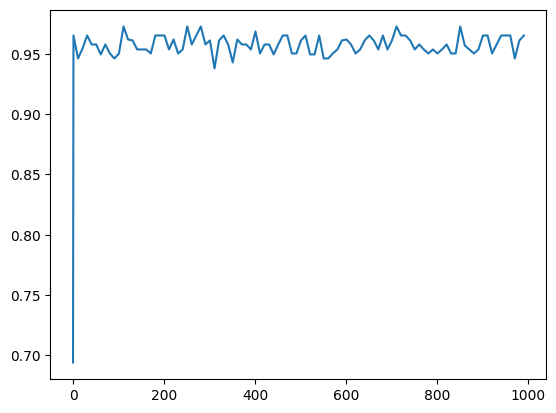

In [37]:
#X2_poly = poly_features.fit_transform(data2['data'])
#clf = LogisticRegressionCV(cv=5, random_state=42, Cs=3, refit=False).fit(X_train2, y_train2)

ROCAUC = []
CS = []
c_values = np.logspace(-2, 3, 500)
#for ci in c_values:
clf = LogisticRegressionCV(cv=5, random_state=42, Cs=c_values, refit=False, verbose=1).fit(X_train2, y_train2)
print("Оптимальное значение параметра регуляризации C: ", clf.C_)

for i in a:
  clf = LogisticRegression(C=i,  random_state=42).fit(X_train2, y_train2)
  ROCAUC.append(roc_auc_score(y_test2, clf.predict(X_test2), average=None))
plt.plot(a, ROCAUC)


'''
ROCAUC.append(roc_auc_score(y_test2, clf.predict(X_test2), average=None))
CS.append(clf.scores_)
#for i in range(len(CS)):
print(clf.scores_)
plt.scatter(CS, ROCAUC)

#print('\n\n\n\n', roc_auc_score(y_test2, clf.decision_function(X_test2), average=None))
#print('\n\n\n\n', roc_auc_score(y_train2, clf.predict_proba(X_train2)[:, 1], average=None))
#print('\n\n\n\n', roc_auc_score(y_test2, clf.predict_proba(X_test2)[:, 2]))
#print('\n\n\n\n', clf.C_, '\n\n\n\n')
'''

Выводы: было найдено оптимальное значение параметра регуляризации C с помощью LogisticRegressionCV. А также построен график зависимости метрики ROC-AUC от параметра С, из которого видно, что в 0 происходит резкий скачок, после которого значение метрики колеблется в районе 0,95.

3. Выбрать порог классификации для LogisticRegression на основе метрики

In [38]:
### Поиск оптимального порога классификации на основе F1-score ###
thresholds = np.linspace(0, 1, 100)  # Перебираем пороги от 0 до 1
f1_scores = [f1_score(y_test2, clf.predict_proba(X_test2)[:, 1] >= t) for t in thresholds]  # Вычисляем F1-score для каждого порога

# Находим порог, который максимизирует F1-score
optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_f1 = np.max(f1_scores)

print(f'Оптимальный порог классификации: {optimal_threshold:.4f}')
print(f'Максимальный F1-score: {optimal_f1:.4f}')

Оптимальный порог классификации: 0.2525
Максимальный F1-score: 0.9798


Выводы: В результате выполнения данного задания был найден порог классификации для LogisticRegression на основе метрики F1-score

#Черновик


In [39]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

NameError: name 'StratifiedKFold' is not defined

In [ ]:
sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X_train1, y_train1)

sk_lr_pred_res = sk_linear_regression.predict(X_test1)
sk_lr_r2 = r2_score(y_test1, sk_lr_pred_res)
sk_lr_mape = mean_absolute_percentage_error(y_test1, sk_lr_pred_res)

print(f'Scikit-learn Linear regression R2 score: {sk_lr_r2}')
print(f'Scikit-learn Linear regression MAPE: {sk_lr_mape}', '\n')

print(f'weights: {sk_linear_regression.intercept_, *sk_linear_regression.coef_}')
print(f'prediction: {sk_lr_pred_res}', '\n')

#sk_linear_regression.fit(X_train_s, y1_train)
#print(f'scaled weights: {sk_linear_regression.intercept_, *sk_linear_regression.coef_}')